In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Datasets/Cleaned_prepared_data.csv')
data

,Unnamed: 0,timestamp,icao24,latitude,longitude,ground_speed,track,vertical_rate,baro_altitude,latitude_in_10min,longitude_in_10min,baro_altitude_in_10min,Climbing,Descending,Cruise
0,1081344,2022-10-30 21:29:07,484133,50.280304,2.691000,524.069199,32.295105,0.0,34000.0,51.483078,3.806911,17550.0,False,False,True
1,1081404,2022-10-30 21:30:07,484133,50.403076,2.812572,523.759989,32.446022,-64.0,34000.0,51.590744,3.887824,15500.0,False,True,False
2,1081464,2022-10-30 21:31:07,484133,50.525436,2.934795,525.140480,32.479560,-960.0,33000.0,51.692210,3.963928,13425.0,False,True,False
3,1081526,2022-10-30 21:32:09,484133,50.651023,3.060657,530.969409,32.462916,-896.0,32025.0,51.791087,4.038773,11300.0,False,True,False
4,1081586,2022-10-30 21:33:09,484133,50.777573,3.188336,535.111675,32.561525,-1984.0,30625.0,51.883118,4.107254,10500.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9391,703333,2022-10-24 06:48:46,503d40,45.536840,14.723153,466.511119,141.877264,0.0,39025.0,44.368515,16.049717,39000.0,False,False,True
9392,703395,2022-10-24 06:49:48,503d40,45.431396,14.840437,464.490718,141.995192,0.0,39000.0,44.368515,16.049717,39000.0,False,False,True
9393,703457,2022-10-24 06:50:50,503d40,45.326936,14.956010,461.069011,142.135915,0.0,39000.0,44.177608,16.264147,39000.0,False,False,True
9394,703521,2022-10-24 06:51:54,503d40,45.218857,15.075008,466.068262,142.146580,-64.0,38975.0,44.177608,16.264147,39000.0,False,True,False


In [3]:
# Selecting the features and targets
features = data[['latitude', 'longitude', 'baro_altitude']]
targets = data[['latitude_in_10min', 'longitude_in_10min', 'baro_altitude_in_10min']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Creating a Linear Regression model
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, y_train)

# The model is now trained and can be used for predictions
"Model trained successfully"

'Model trained successfully'

In [4]:
# Predictions on the training and testing sets
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

# Evaluating the model
mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

(mae_train, mae_test, r2_train, r2_test)

(1195.9735040775283, 1201.399400520094, 0.7595346511302977, 0.7619417342613609)

In [5]:
# Separating the predictions and true values for latitude and longitude
train_lat_true, train_long_true, train_alt_true = y_train['latitude_in_10min'], y_train['longitude_in_10min'], y_train['baro_altitude_in_10min']
test_lat_true, test_long_true, test_alt_true = y_test['latitude_in_10min'], y_test['longitude_in_10min'], y_test['baro_altitude_in_10min']
train_lat_pred, train_long_pred, train_alt_pred = train_predictions[:, 0], train_predictions[:, 1], train_predictions[:, 2]
test_lat_pred, test_long_pred, test_alt_pred = test_predictions[:, 0], test_predictions[:, 1], test_predictions[:, 2]

# Calculating metrics for latitude
mae_train_lat = mean_absolute_error(train_lat_true, train_lat_pred)
mae_test_lat = mean_absolute_error(test_lat_true, test_lat_pred)
r2_train_lat = r2_score(train_lat_true, train_lat_pred)
r2_test_lat = r2_score(test_lat_true, test_lat_pred)

# Calculating metrics for longitude
mae_train_long = mean_absolute_error(train_long_true, train_long_pred)
mae_test_long = mean_absolute_error(test_long_true, test_long_pred)
r2_train_long = r2_score(train_long_true, train_long_pred)
r2_test_long = r2_score(test_long_true, test_long_pred)

# Calculating metrics for Altitude
mae_train_alt = mean_absolute_error(train_alt_true, train_alt_pred)
mae_test_alt = mean_absolute_error(test_alt_true, test_alt_pred)
r2_train_alt = r2_score(train_alt_true, train_alt_pred)
r2_test_alt = r2_score(test_alt_true, test_alt_pred)

print("Latitude metrics:", mae_train_lat, mae_test_lat, r2_train_lat, r2_test_lat)
print("Longitude metrics:", mae_train_long, mae_test_long, r2_train_long, r2_test_long)
print("Altitude metrics:", mae_train_alt, mae_test_alt, r2_train_alt, r2_test_alt)

Latitude metrics: 0.6504229742462833 0.6482378914341893 0.9270818492720301 0.928817080199455
Longitude metrics: 0.2861221163477633 0.2860674610619336 0.9853904142067594 0.9849634840306989
Altitude metrics: 3586.983967141986 3603.263896207791 0.3661316899121039 0.3720446385539291


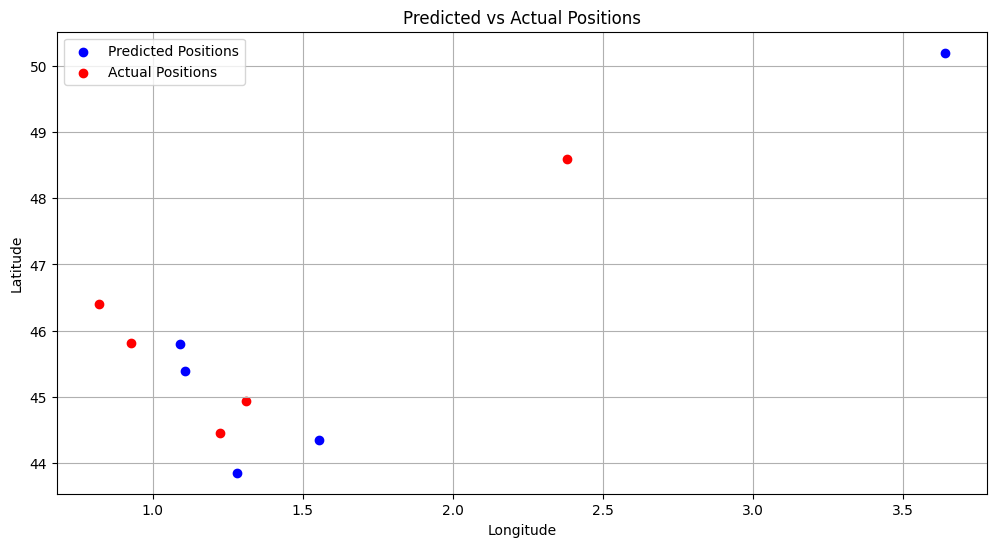

In [6]:
# Selecting a few random samples from the test dataset for prediction
np.random.seed(2)
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
sample_data = X_test.loc[sample_indices]

# Using the model to predict the latitude and longitude in 10 minutes
predicted_positions = linear_model.predict(sample_data)

# Actual positions for comparison
actual_positions = y_test.loc[sample_indices]

# Visualization
plt.figure(figsize=(12, 6))

# Plotting predicted positions
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='blue', label='Predicted Positions')

# Plotting actual positions
plt.scatter(actual_positions['longitude_in_10min'], actual_positions['latitude_in_10min'], color='red', label='Actual Positions')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted vs Actual Positions')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Selecting a few example data points from the test set
example_data = X_test.sample(5, random_state=1)

# Actual values for comparison
actual_values = y_test.loc[example_data.index]

# Making predictions
predictions = linear_model.predict(example_data)

# Creating a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual Latitude': actual_values['latitude_in_10min'],
    'Predicted Latitude': predictions[:, 0],
    'Latitude Error': np.abs(actual_values['latitude_in_10min'] - predictions[:, 0]),
    'Actual Longitude': actual_values['longitude_in_10min'],
    'Predicted Longitude': predictions[:, 1],
    'Longitude Error': np.abs(actual_values['longitude_in_10min'] - predictions[:, 1]),
    'Actual Altitude': actual_values['baro_altitude_in_10min'],
    'Predicted Altitude': predictions[:, 2],
    'Altitude Error': np.abs(actual_values['baro_altitude_in_10min'] - predictions[:, 2])
})

comparison.reset_index(drop=True, inplace=True)
comparison

,Actual Latitude,Predicted Latitude,Latitude Error,Actual Longitude,Predicted Longitude,Longitude Error,Actual Altitude,Predicted Altitude,Altitude Error
0,47.339539,48.035635,0.696096,12.485550,12.305979,0.179571,37350.0,36529.465597,820.534403
1,49.907397,49.540358,0.367039,2.398212,1.793271,0.604941,36000.0,31433.887373,4566.112627
2,45.234949,44.671461,0.563488,1.162340,1.187658,0.025318,36000.0,37075.862809,1075.862809
3,48.648345,50.223814,1.575469,2.384901,3.732281,1.347380,37000.0,31535.833386,5464.166614
4,45.227315,44.643744,0.583571,1.064267,1.207378,0.143111,36000.0,37114.393963,1114.393963
